In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel('Iris.xls')
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Simple Linear Regression

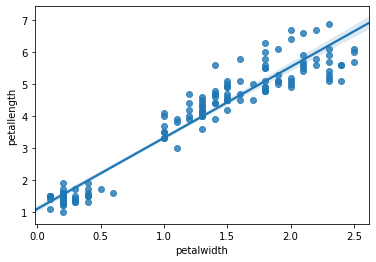

In [23]:
sns.regplot(data=data, x='petalwidth', y='petallength')
plt.show()

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
inputs=data[['petalwidth']]
outputs=data[['petallength']]

In [6]:
reg=linear_model.LinearRegression()
reg=reg.fit(inputs, outputs)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2)

reg2=linear_model.LinearRegression()
reg2=reg2.fit(X_train, Y_train)
pd.DataFrame(Y_test.values)[0].values

array([4.7, 1.6, 5.1, 4. , 5.6, 4.5, 4.5, 5.1, 1.4, 4.4, 4.7, 4.1, 4.8,
       1.9, 3.5, 1.5, 1.1, 4.4, 1.3, 3. , 1.4, 3.9, 5.3, 4.1, 4.3, 5.7,
       4.8, 5.1, 5. , 1.6])

In [8]:
y_pred=reg2.predict(X_test)
pd.DataFrame(y_pred)[0]

0     4.680625
1     1.968946
2     4.680625
3     4.002705
4     5.132571
5     4.454651
6     4.680625
7     6.262437
8     1.516999
9     4.228678
10    3.776732
11    3.324785
12    5.132571
13    1.968946
14    3.324785
15    1.516999
16    1.291026
17    4.002705
18    1.516999
19    3.550758
20    1.516999
21    4.228678
22    6.262437
23    4.002705
24    4.002705
25    6.714384
26    5.132571
27    5.358544
28    4.906598
29    1.516999
Name: 0, dtype: float64

In [9]:
df=pd.DataFrame({'Actual':pd.DataFrame(Y_test.values)[0].values,
                 'Prediction':pd.DataFrame(y_pred)[0].values})
df.head()

,Actual,Prediction
0,4.7,4.680625
1,1.6,1.968946
2,5.1,4.680625
3,4.0,4.002705
4,5.6,5.132571


In [10]:
m=reg2.coef_[0][0]
'Coefficients: ',m

('Coefficients: ', 2.259732505373777)

In [11]:
b= reg2.intercept_[0]
'Intercept: ',b

('Intercept: ', 1.0650525435872926)

In [12]:
mse=mean_squared_error(outputs, reg2.predict(inputs))
'Mean squared error: ',mse

('Mean squared error: ', 0.22694180678156844)

In [13]:
var=reg2.score(inputs, outputs)
'Variance score: ', var

('Variance score: ', 0.9266136398019004)

In [14]:
# Check the score of train and test
reg2.score(X_test, Y_test)

0.9014801494256618

In [15]:
reg2.score(X_train, Y_train)

0.9307595228251089

In [16]:
reg_line = [(m*float(x)) + b for x in np.array(inputs)]

In [21]:
x1=[[1.5]]
y1=reg2.predict(x1)
y1[0][0]

4.454651301647958

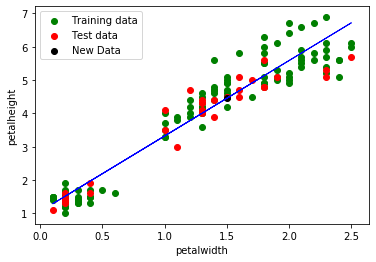

In [22]:
# Plot outputs
plt.scatter(X_train, Y_train, color ='green', label = 'Training data')
plt.scatter(X_test, Y_test, color = 'red', label = 'Test data')
plt.scatter(x1, y1, color = 'black', label = 'New Data')
plt.plot(inputs, reg_line, color = 'blue', linewidth = 1)

plt.xlabel('petalwidth')
plt.ylabel('petalheight')
plt.legend()
plt.show()

### Multiple Linear Regression

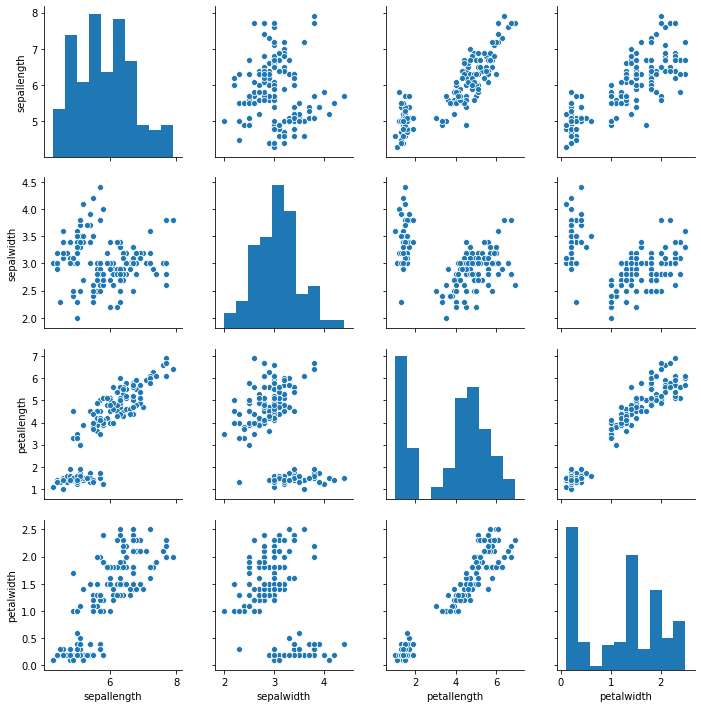

In [24]:
sns.pairplot(data)
plt.show()

In [25]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
inputs2=data[['sepallength', 'sepalwidth', 'petallength']]
inputs2.head()

,sepallength,sepalwidth,petallength
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [28]:
outputs2=data[['petalwidth']]
outputs2.head()

,petalwidth
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [29]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(inputs2, outputs2, test_size=0.2)

reg3=linear_model.LinearRegression()
reg3=reg3.fit(X_train2, Y_train2)
pd.DataFrame(Y_test2.values)[0].values

array([1. , 1.3, 0.2, 1.5, 1.2, 1.8, 1.6, 0.2, 2.1, 2.4, 0.3, 0.2, 1.5,
       0.2, 1.8, 0.4, 1.3, 2.2, 1.4, 2.1, 1.5, 2.3, 1.3, 0.4, 0.2, 1.7,
       2.4, 1.8, 0.2, 0.2])

In [30]:
y_pred2=reg3.predict(X_test2)

In [33]:
m2=reg3.coef_[0]
'Coefficients: ',m2

('Coefficients: ', array([-0.22718345,  0.2439214 ,  0.52903979]))

In [34]:
b2= reg3.intercept_[0]
'Intercept: ',b2

('Intercept: ', -0.2115547181482249)

In [35]:
mse2=mean_squared_error(outputs2, reg3.predict(inputs2))
'Mean squared error: ',mse2

('Mean squared error: ', 0.035989369965282916)

In [36]:
var2=reg3.score(inputs2, outputs2)
'Variance score: ', var2

('Variance score: ', 0.9377918635212165)

In [37]:
# Check the score of train and test
reg3.score(X_test2, Y_test2)

0.9460386239684586

In [38]:
reg3.score(X_train2, Y_train2)

0.9356645403876526

In [39]:
Y_train_hat=reg3.predict(X_train2)
Y_test_hat=reg3.predict(X_test2)

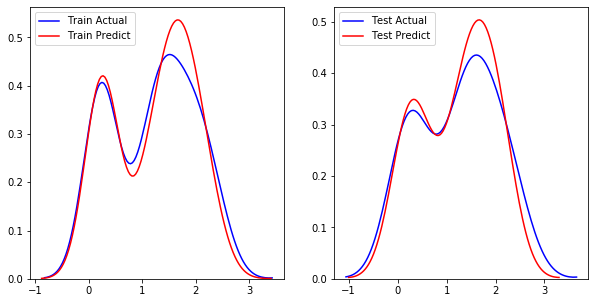

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1=sns.distplot(Y_train2, hist=False, color ='b', label = 'Train Actual')
sns.distplot(Y_train_hat, hist=False, color = 'r', label = 'Train Predict', ax=ax1)

plt.subplot(1,2,2)
ax2=sns.distplot(Y_test2, hist=False, color ='b', label = 'Test Actual')
sns.distplot(Y_test_hat, hist=False, color = 'r', label = 'Test Predict', ax=ax2)
plt.show()

In [41]:
x2=[[4.5, 3.1, 1.6]]
y2=reg3.predict(x2)
y2

array([[0.36873976]])